In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

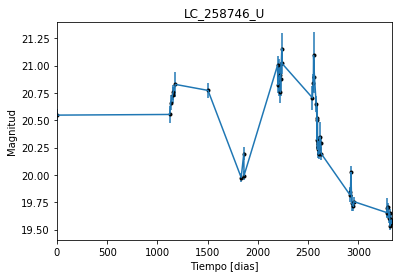

In [2]:
data = np.genfromtxt('LC_258746_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_258746_U')
plt.savefig("LC_258746_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

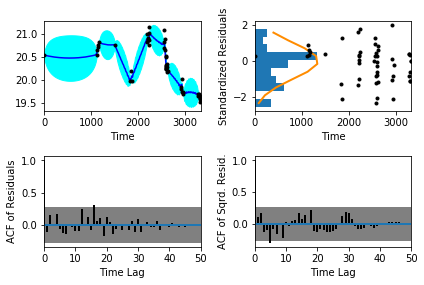

In [5]:
sample.assess_fit()

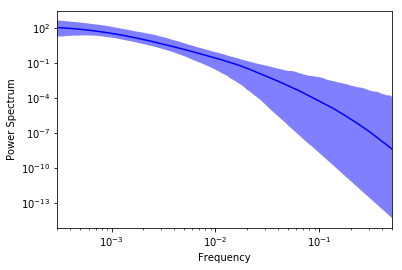

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

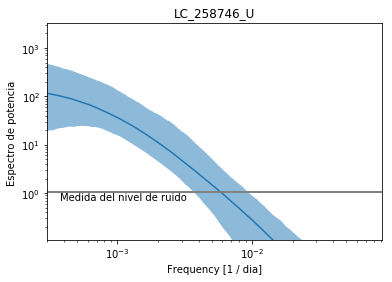

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_258746_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_258746_U')

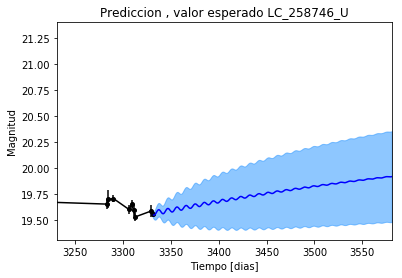

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_258746_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_258746_U')

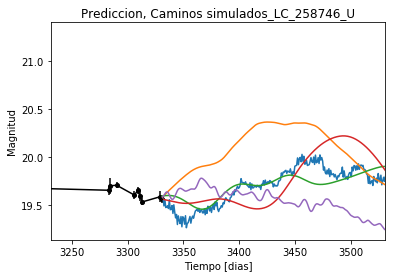

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_258746_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


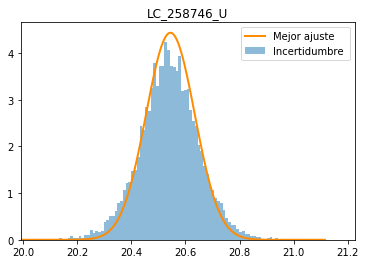

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_258746_U')
plt.savefig("Mejor_ajuste_LC_258746_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_258746_U')

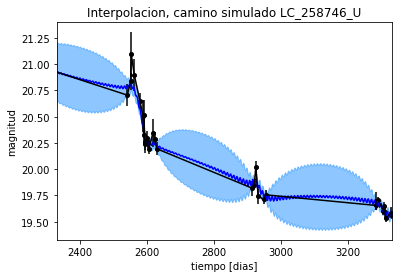

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_U')

Text(0.5,1,'Interpolacion, camino simulado LC_258746_U')

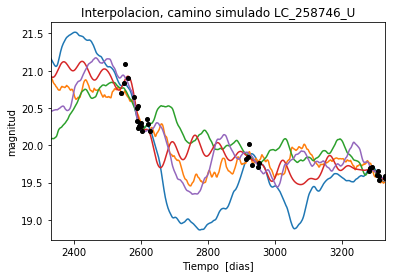

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 386.138223021
Median: 0.0299015789245
Standard deviation: 0.220907679569
68% credibility interval: [ 0.0019619   0.31394689]
95% credibility interval: [  4.40113233e-04   8.37888412e-01]
99% credibility interval: [  3.25634344e-04   9.56487132e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 377.607998792
Median: 0.00509928803883
Standard deviation: 0.109131977649
68% credibility interval: [ 0.00056201  0.06877243]
95% credibility interval: [  3.23384002e-04   3.71918290e-01]
99% credibility interval: [  3.03601691e-04   7.73243480e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 172.790101435
Median: 0.0325910386418


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 684.659978503
Median: 43.5808383886
Standard deviation: 1.86337505497
68% credibility interval: [ 41.48268689  44.94150675]
95% credibility interval: [ 38.57303077  45.63601234]
99% credibility interval: [ 36.37920403  46.16288206]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 254.169097439
Median: 0.982687062668
Standard deviation: 2.48125905672
68% credibility interval: [ 0.10643355  4.73524609]
95% credibility interval: [ 0.02483018  8.6445696 ]
99% credibility interval: [  0.01338592  11.05261299]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 514.551661778
Median: 1.17552518116
Standard deviation: 10.0807976376
68% credibility interval: [  0.05250182  13.10219131]
95% credibility interval: [  4.19115872

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 451.917874727
Median: 9.44256268944e-23
Standard deviation: 2.93295585581e+100
68% credibility interval: [  2.61264809e-44   4.90635851e-01]
95% credibility interval: [  2.24452183e-94   8.00422175e+65]
99% credibility interval: [  6.08264543e-117   1.38868342e+100]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2454.78932333
Median: 20.3430913201
Standard deviation: 0.253896735712
68% credibility interval: [ 20.11837947  20.54680172]
95% credibility interval: [ 19.79895494  20.82417357]
99% credibility interval: [ 19.53455576  21.08379703]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 319.299226027
Median: 0.029119605409
Standard deviation: 0.260237362109
68% credibility interval: [ 0.          0.43936388]
95% credibility interval: [ 0.        0.909214]
99% credibility interval: [ 0.          0.98366832]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 319.299226027
Median: 0.029119605409
Standard deviation: 0.260237362109
68% credibility interval: [ 0.          0.43936388]
95% credibility interval: [ 0.        0.909214]
99% credibility interval: [ 0.          0.98366832]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 506.51864791
Median: 0.0
Standard deviation: 0.000392514409431
68% credibility i

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 684.659978503
Median: 43.5808383886
Standard deviation: 1.86337505497
68% credibility interval: [ 41.48268689  44.94150675]
95% credibility interval: [ 38.57303077  45.63601234]
99% credibility interval: [ 36.37920403  46.16288206]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2823.05300541
Median: 0.266259757099
Standard deviation: 0.252987424801
68% credibility interval: [ 0.16872463  0.46275715]
95% credibility interval: [ 0.1175277   0.89402959]
99% credibility interval: [ 0.0911176   1.59667884]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 809.439146636
Median: 1.0978766549
Standard deviation: 0.205802345496
68% credibility interval: [ 0.92019007  1.31640033]
95% credibility interval: [ 0.77113235  1.57819191]
99% credibility interval: [ 0.68090284  1.78175445]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 321.767698171
Median: 0.00314409075363
Standard deviation: 0.474179071623
68% credibility interval: [  1.10312919e-05   1.03632485e-01]
95% credibility interval: [  1.22664789e-68   1.17909999e+00]
99% credibility interval: [  1.72040567e-103   3.39977777e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 386.138223021
Median: (-0.18787716136-4.58321999558j)
Standard deviation: 2.14480087586
68% credibility interval: [-1.97258651-0.4955051j  -0.01232698-0.61557475j]
95% credibility interval: [ -5.26460816e+00+0.j          -2.76531300e-03-1.28106344j]
99% credibility interval: [ -6.00978589e+00+0.j          -2.04602092e-03-0.00336642j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 377.607998792
Median: (-0.0320397716826+0j)
Standard deviation: 1.77307518564
68% credibility interval: [-0.43210994+4.23470364j -0.00353119+5.94824135j]
95% credibility interval: [ -2.33683153e+00+3.5137318j  -2.03188161e-03+0.j       ]
99% credibility interval: [ -4.85843207e+00+4.88802559j  -1.90758569e-03+0.j        ]
Posterior summary fo